# Árboles de Decisión
### Padecimientos cardíacos


<img src="imagenes/arbol.jpg" width="525" align="left">

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Gráfica dispersión: Edad y Colesterol

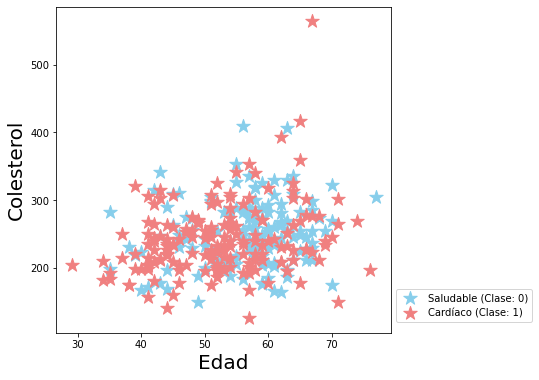

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [2]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


30    0.25
20    0.25
50    0.25
40    0.25
dtype: float64
110    0.5
100    0.5
dtype: float64
2.0
1.0


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Datos de Entrenamiento y Prueba

In [12]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Creación del Árbol de Decisión

0.5777777777777777
|--- Edad <= 54.50
|   |--- Colesterol <= 173.50
|   |   |--- class: 0
|   |--- Colesterol >  173.50
|   |   |--- Colesterol <= 278.50
|   |   |   |--- Colesterol <= 264.50
|   |   |   |   |--- Colesterol <= 176.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Colesterol >  176.00
|   |   |   |   |   |--- Edad <= 34.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Edad >  34.50
|   |   |   |   |   |   |--- Edad <= 36.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Edad >  36.00
|   |   |   |   |   |   |   |--- Colesterol <= 233.50
|   |   |   |   |   |   |   |   |--- Colesterol <= 226.00
|   |   |   |   |   |   |   |   |   |--- Colesterol <= 192.50
|   |   |   |   |   |   |   |   |   |   |--- Colesterol <= 187.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Colesterol >  187.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |

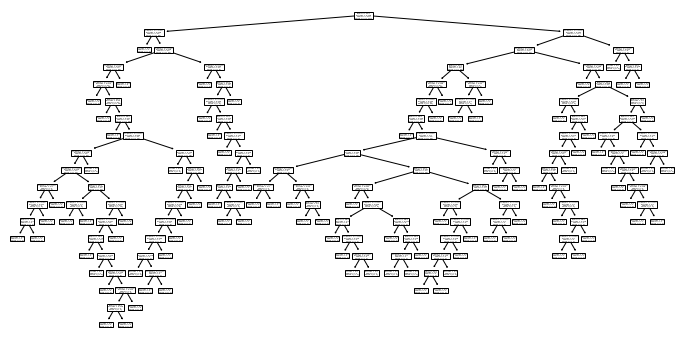

In [15]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Clasifica a nuevos pacientes

In [14]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0]


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>